In [659]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
import gc

%matplotlib inline

In [660]:
data = pd.read_csv('KR_youtube_trending_data.csv', encoding='utf-8')

In [661]:
# trending_date를 숫자 데이터로
data.trending_date=pd.to_datetime(data.trending_date, format='%Y-%m-%d')
# 데이터를 trending_date로 분류
data.sort_values(by='trending_date', axis=0, inplace=True)

In [662]:
# trending date를 기반으로 가장 마지막 날로부터 두 달까지의 데이터를 테스트
# 과거 데이터로 최근의 데이터를 예측
data_train=data[data.trending_date<'2021-08-09'].copy()
data_test=data[data.trending_date>='2021-08-09'].copy()

del data
gc.collect()

2697

In [663]:
# y값 = 조회수
y_train=data_train.view_count.values
y_test=data_test.view_count.values

del data_train['view_count'], data_test['view_count']
gc.collect()

# x값 = 조회수를 제외한 데이터
X_train=data_train.copy()
X_test=data_test.copy()

del data_train,data_test
gc.collect()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((70554, 15), (12400, 15), (70554,), (12400,))

Text(0.5, 1.0, 'Histogram of y_train')

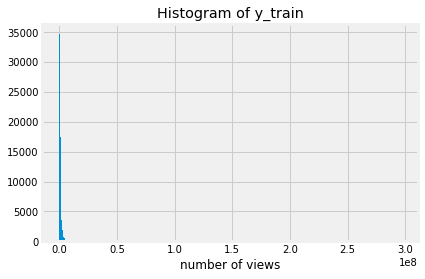

In [664]:
fig,ax=plt.subplots()
ax.hist(y_train,bins=500)
ax.set_xlabel('number of views')
ax.set_title('Histogram of y_train')
# 조회수가 낮은 쪽으로 데이터가 몰려있음

Text(0.5, 1.0, 'Histogram of transformed y_train')

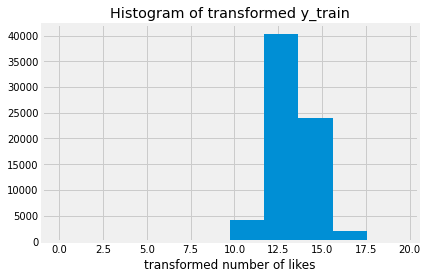

In [665]:
# 로그변환
fig,ax=plt.subplots()
ax.hist(np.log(y_train+1))
ax.set_xlabel('transformed number of likes')
ax.set_title('Histogram of transformed y_train')

In [666]:
# 조회수 이외의 좋아요, 댓글수도 로그변환하여 업데이트 시킴. 

X_train['likes']=np.log(X_train['likes']+1)
X_train['comment_count']=np.log(X_train['comment_count']+1)

X_test['likes']=np.log(X_test['likes']+1)
X_test['comment_count']=np.log(X_test['comment_count']+1)

train=X_train.copy()
train['view_count']=np.log(y_train+1)

test=X_test.copy()

<AxesSubplot:xlabel='likes', ylabel='view_count'>

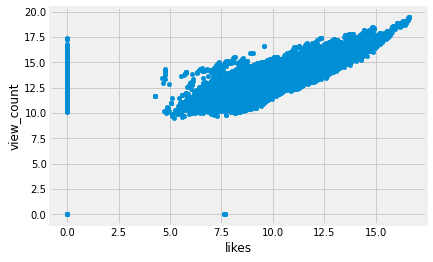

In [667]:
# 조회수와 좋아요 수의 관계
train.plot.scatter(x='likes',y='view_count')

<AxesSubplot:xlabel='comment_count', ylabel='view_count'>

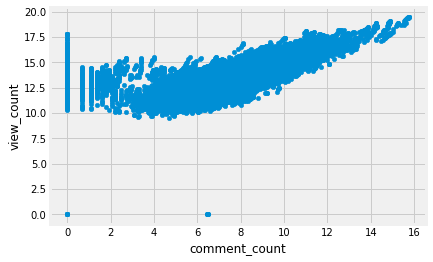

In [668]:
# 조회수와 댓글 수의 관계
train.plot.scatter(x='comment_count',y='view_count')

<AxesSubplot:xlabel='dislikes', ylabel='view_count'>

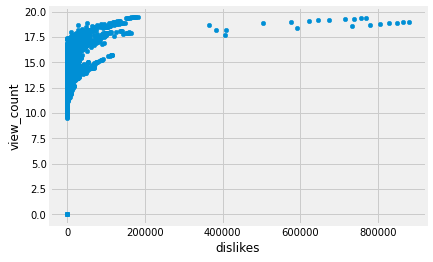

In [669]:
# 조회수와 싫어요 수의 관계
train.plot.scatter(x='dislikes',y='view_count')

In [670]:
# X_train=train[['likes','comment_count', 'dislikes', 'categoryId']]
# X_test = test[['likes','comment_count', 'dislikes', 'categoryId']]
X_train=train[['likes','comment_count', 'dislikes', 'video_id']]
X_test = test[['likes','comment_count', 'dislikes', 'video_id']]

In [671]:
train_rows=X_train.shape[0]
df=pd.concat([X_train,X_test])

df=pd.get_dummies(df)

X_train=df[:train_rows].copy()
X_test=df[train_rows:].copy()

del df
gc.collect()

73

In [672]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

#1. LinearRegression
lr = LinearRegression()
#2. Lasso
lasso = Lasso(alpha = 0.1)
#3. ElasticNet
el = ElasticNet(alpha = 0.1, l1_ratio = 0.5)



In [673]:
# Linear_Regression
# Linear_Regression의 score(R-squared)값은 0.54
lr.fit(X_train,np.log(y_train+1))
lr.score(X_train,np.log(y_train+1))

0.5438903271596209

In [674]:
# Linear_Regression의 MSE score 값은 0.44
lr.fit(X_test,np.log(y_test+1))
lr.score(X_test,np.log(y_test+1))

0.44537991079930184

In [675]:
# Linear_Regression을 활용한 예상 조회수 = 1820555
from sklearn import metrics

y_pred=lr.predict(X_test)
metrics.mean_absolute_error(y_test,y_pred)

1820555.668798299

In [676]:
# Lasso_Regression
# Lasso_Regression의 score(R-squared)값은 0.45
lasso.fit(X_train,np.log(y_train+1))
lasso.score(X_train,np.log(y_train+1))

0.5402703001729615

In [677]:
# Lasso_Regression의 MSE score 값은 0.34
lasso.fit(X_test,np.log(y_test+1))
lasso.score(X_test,np.log(y_test+1))

0.44125619302880104

In [678]:
# Lasso_Regression을 활용한 예상 조회수 = 1820555
from sklearn import metrics

y_pred=lasso.predict(X_test)
metrics.mean_absolute_error(y_test,y_pred)

1820555.668798299

In [679]:
# ElasticeNet_Regression
# ElasticeNet_Regression의 score(R-squared)값은 0.51
el.fit(X_train,np.log(y_train+1))
el.score(X_train,np.log(y_train+1))

0.5424479908671884

In [680]:
# ElasticeNet_Regression의 MSE score 값은 0.41
el.fit(X_test,np.log(y_test+1))
el.score(X_test,np.log(y_test+1))

0.44391847108870064

In [681]:
# ElasticeNet_Regression을 활용한 예상 조회수 = 1820555
from sklearn import metrics

y_pred=el.predict(X_test)
metrics.mean_absolute_error(y_test,y_pred)

1820555.668798299

Text(0.5, 1.0, 'view_count vs linear Predicted view_count: $Y_i$ vs $\\hat{Y}_i$')

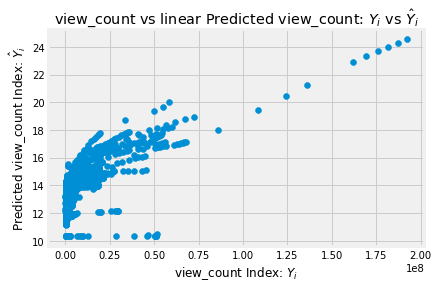

In [682]:
%matplotlib inline
import matplotlib.pyplot as plt


Y_pred = lr.predict(X_test)

plt.scatter(y_test, Y_pred)
plt.xlabel("view_count Index: $Y_i$")
plt.ylabel("Predicted view_count Index: $\hat{Y}_i$")
plt.title("view_count vs linear Predicted view_count: $Y_i$ vs $\hat{Y}_i$")

Text(0.5, 1.0, 'view_count vs Lasso Predicted view_count: $Y_i$ vs $\\hat{Y}_i$')

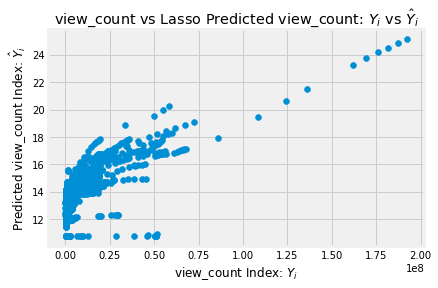

In [683]:
%matplotlib inline
import matplotlib.pyplot as plt

Y_pred = lasso.predict(X_test)

plt.scatter(y_test, Y_pred)
plt.xlabel("view_count Index: $Y_i$")
plt.ylabel("Predicted view_count Index: $\hat{Y}_i$")
plt.title("view_count vs Lasso Predicted view_count: $Y_i$ vs $\hat{Y}_i$")

Text(0.5, 1.0, 'view_count vs ElasticeNet Predicted view_count: $Y_i$ vs $\\hat{Y}_i$')

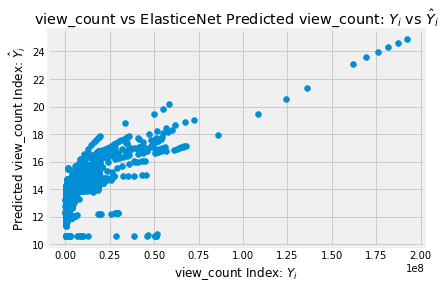

In [684]:
%matplotlib inline
import matplotlib.pyplot as plt


Y_pred = el.predict(X_test)

plt.scatter(y_test, Y_pred)
plt.xlabel("view_count Index: $Y_i$")
plt.ylabel("Predicted view_count Index: $\hat{Y}_i$")
plt.title("view_count vs ElasticeNet Predicted view_count: $Y_i$ vs $\hat{Y}_i$")